## importaciones

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Cargar el archivo Excel
df_facebook = pd.read_excel("Facebook_scraping.xlsx")

# para facebook

# 1. Análisis: Distribución de carros por estado

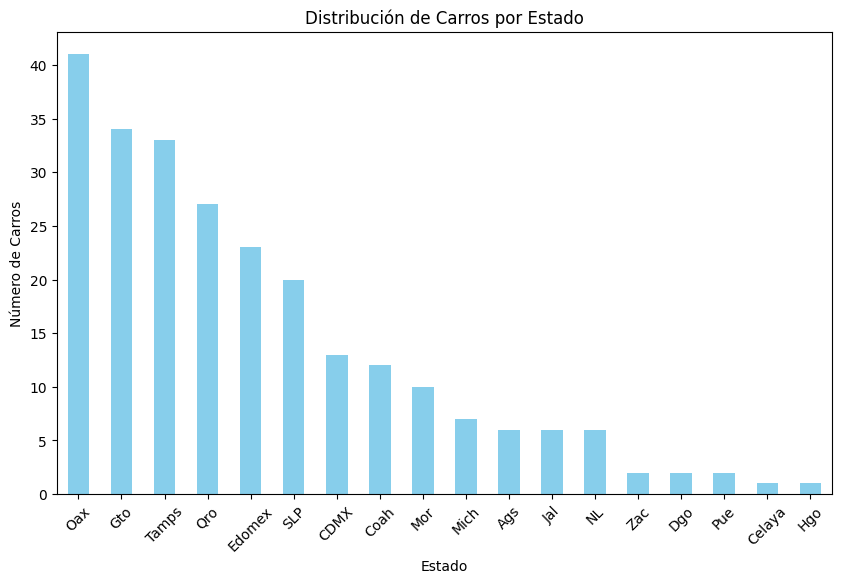

In [51]:
# 1. Análisis: Distribución de carros por estado
estado_counts = df_facebook['Estado'].value_counts()

# Gráfica de barras: Número de carros por estado
plt.figure(figsize=(10,6))
estado_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Carros por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.show()








In [52]:
# 1. Verificar si existen valores nulos
print("Valores nulos por columna:")
print(df_facebook.isnull().sum())

# 2. Eliminar filas con valores nulos en cualquier columna
df = df_facebook.dropna()

Valores nulos por columna:
Precio          0
Año            38
Marca          38
Modelo         52
Ciudad          1
Estado          1
Kilometraje    55
dtype: int64


# 2 ¿Cual es el precio promedio por cada estado?

Estado
Ags          100.36
CDMX         143.54
Coah          106.0
Dgo           358.0
Edomex    81.057308
Gto       98.576923
Jal       95.633333
Mich      42.185167
Mor           74.75
NL          98.2375
Oax       80.546455
Qro       63.780952
SLP       89.344471
Tamps     73.042045
Zac           95.75
Name: Precio, dtype: object


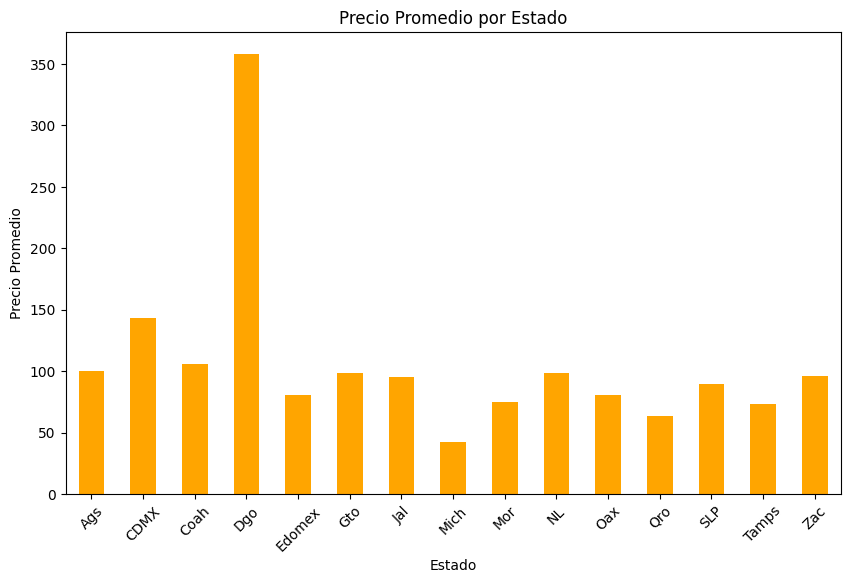

In [53]:
# 2. Asegurarse de que la columna 'Precio' sea numérica (en caso de que contenga strings o caracteres especiales)
df.loc[:, 'Precio'] = pd.to_numeric(df['Precio'], errors='coerce')  # Convierte la columna a numérico, forzando errores a NaN

# 3. Análisis: Promedio de precio por estado
precio_promedio_estado = df.groupby('Estado')['Precio'].mean()

# Comprobación: Verificar los resultados antes de graficar
print(precio_promedio_estado)

# 4. Gráfica de barras: Precio promedio por estado
plt.figure(figsize=(10, 6))
precio_promedio_estado.plot(kind='bar', color='orange')
plt.title('Precio Promedio por Estado')
plt.xlabel('Estado')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

# 3. Análisis: Distribución de carros por marca

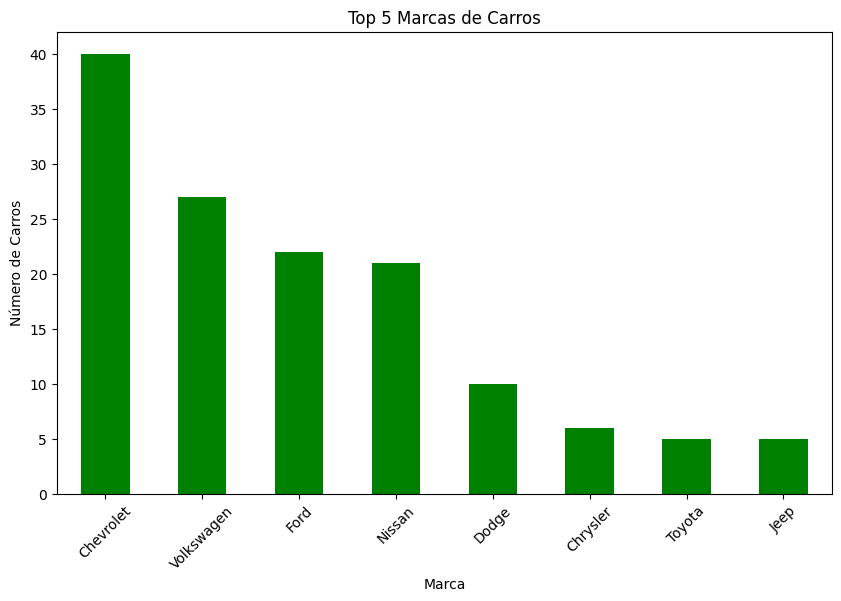

In [54]:
# Contar las marcas
marca_counts = df['Marca'].value_counts()

# Obtener solo las 5 primeras marcas
top_5_marcas = marca_counts.head(8)

# Gráfica de barras: Número de carros por marca (solo top 5)
plt.figure(figsize=(10,6))
top_5_marcas.plot(kind='bar', color='green')
plt.title('Top 5 Marcas de Carros')
plt.xlabel('Marca')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.show()

# 4. Análisis: Kilometraje promedio por marca

C:\Users\tendo\AppData\Local\Temp\ipykernel_32624\648003882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kilometraje'] = pd.to_numeric(df['Kilometraje'], errors='coerce')
C:\Users\tendo\AppData\Local\Temp\ipykernel_32624\648003882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kilometraje'] = df['Kilometraje'].fillna(0)


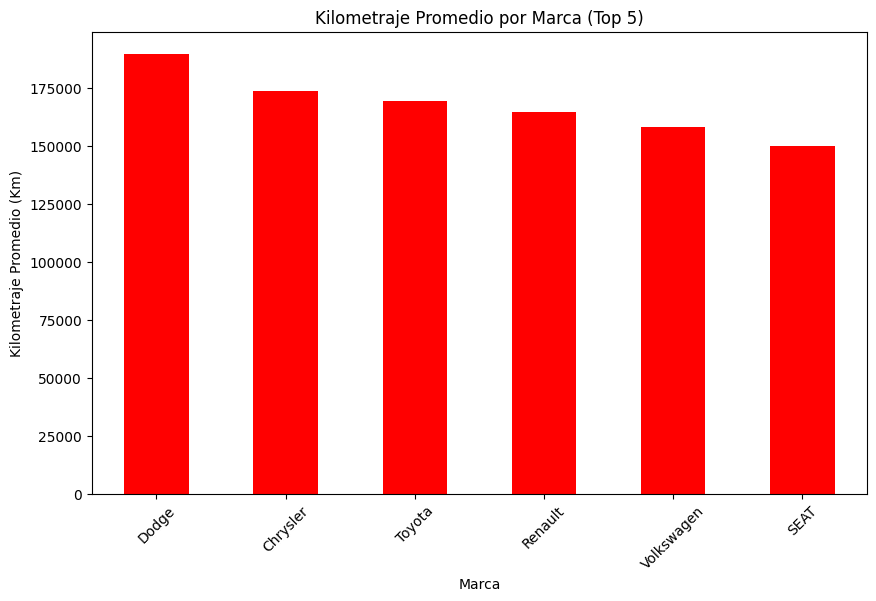

In [58]:
# Asegurarse de que 'Kilometraje' es numérico y no contiene nulos
df['Kilometraje'] = pd.to_numeric(df['Kilometraje'], errors='coerce')
df['Kilometraje'] = df['Kilometraje'].fillna(0)

# Calcular kilometraje promedio por marca y seleccionar los 5 primeros
kilometraje_promedio_marca = df.groupby('Marca')['Kilometraje'].mean().nlargest(6)

# Gráfica de barras: Kilometraje promedio por marca (5 primeras)
plt.figure(figsize=(10,6))
kilometraje_promedio_marca.plot(kind='bar', color='red')
plt.title('Kilometraje Promedio por Marca (Top 5)')
plt.xlabel('Marca')
plt.ylabel('Kilometraje Promedio (Km)')
plt.xticks(rotation=45)
plt.show()

# 5 ¿Qué estado tiene la mayor cantidad de valores nulos?

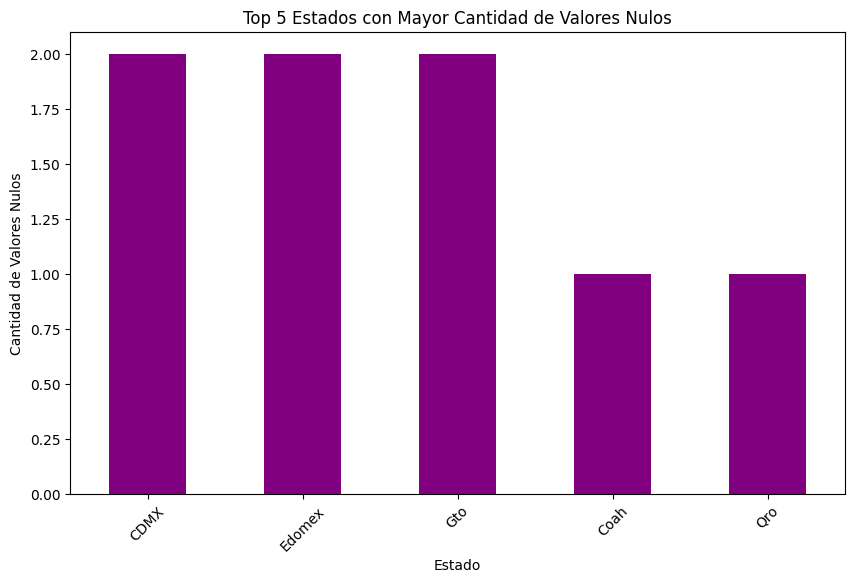

In [56]:

# Contar valores nulos por cada columna y agrupar por 'Estado'
valores_nulos_estado = df.isnull().groupby(df['Estado']).sum().sum(axis=1)

# Ordenar y seleccionar el estado con mayor cantidad de valores nulos
estado_mayor_nulos = valores_nulos_estado.nlargest(5)

# Gráfica de barras: Estado con más valores nulos
plt.figure(figsize=(10, 6))
estado_mayor_nulos.plot(kind='bar', color='purple')
plt.title('Top 5 Estados con Mayor Cantidad de Valores Nulos')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45)
plt.show()


# 6 ¿Cuál es el año de fabricación más común en el dataset?

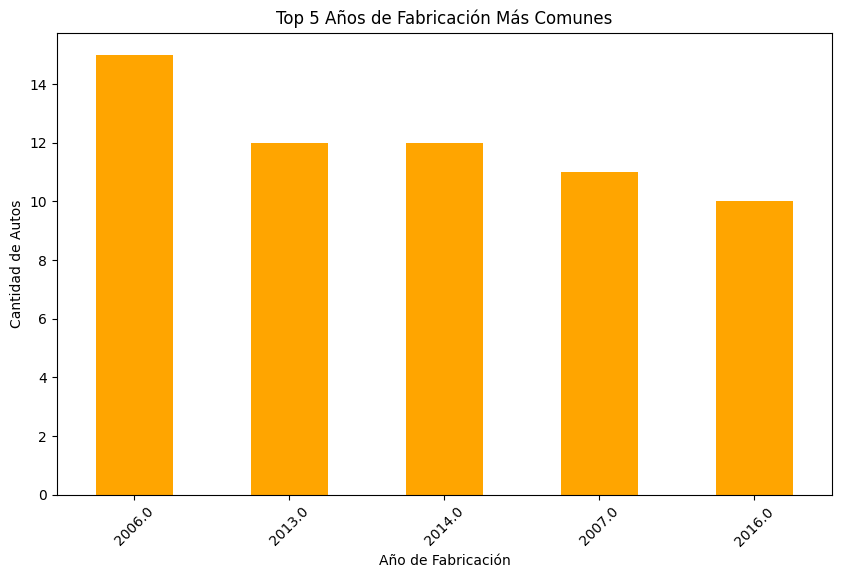

In [57]:
# Contar la frecuencia de cada año de fabricación
anio_fabricacion_comun = df['Año'].value_counts().nlargest(5)

# Gráfica de barras: Años de fabricación más comunes
plt.figure(figsize=(10, 6))
anio_fabricacion_comun.plot(kind='bar', color='orange')
plt.title('Top 5 Años de Fabricación Más Comunes')
plt.xlabel('Año de Fabricación')
plt.ylabel('Cantidad de Autos')
plt.xticks(rotation=45)
plt.show()